In [ ]:
#initilizing libraries for data analysis
import numpy as np                   
import matplotlib.pyplot as plt     
import itertools 
import seaborn as sns

In [ ]:
deg_sign = u"\N{DEGREE SIGN}" #storing degree sign symbol into a variable to be able to print it

In [ ]:
#storing data into 2d array, each raw represents set of measurements for each angle
data = [[55.98, 55.2, 55.45, 55.52, 55.81], #angle 0
        [59.24, 59.74, 59.22, 58.93, 59.29], #angle 10
        [59.86, 59.78, 60.11, 60.16, 59.88], #angle 20
        [61.76, 60.84, 61.09, 61.53, 61.29], #angle 30
        [61.41, 61, 61, 61.08, 61.31], #angle 40
        [60.82, 61.32, 60.79, 61.31, 61.01], #angle 50
        [60.37, 59.97, 60.68, 60.35, 61.05], #angle 60
        [60.16, 60.15, 60.36, 60.3, 60.94], #angle 70
        [60.35, 59.98, 60.13, 59.93, 59.61], #angle 80
        [59.75, 59.7, 59.64, 59.78, 59.61]] #angle 90

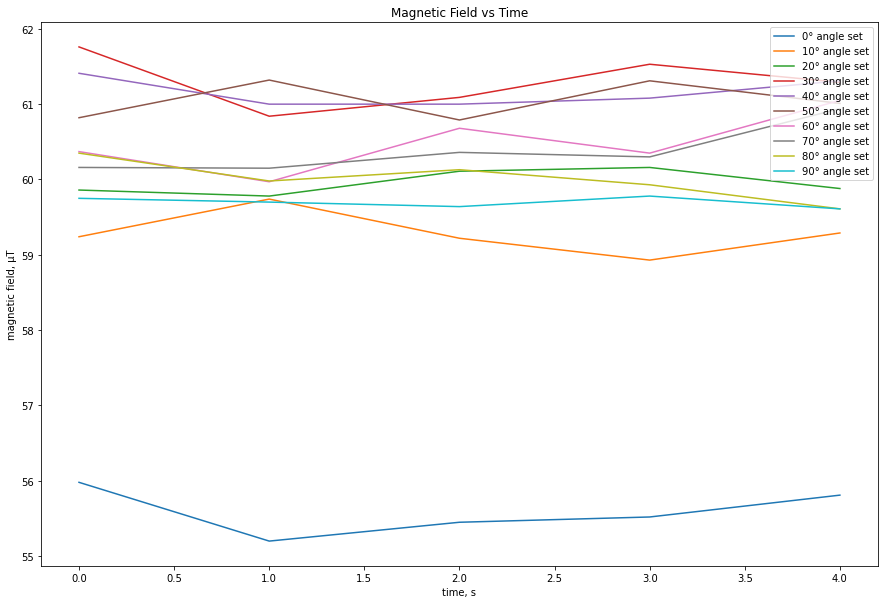

In [ ]:
count = 5 #number of measures for each angle

# visualizing the data
t = np.arange(count)
plt.figure(figsize=(15,10))
for i in range(10):
  plt.plot(t, data[i], label='%d%s angle set' % (i * 10, deg_sign))
plt.title('Magnetic Field vs Time')
plt.xlabel('time, s')
plt.ylabel('magnetic field, \u03BCT')
plt.legend(loc='upper right')

In [ ]:
#initializing to arrays to store mean, standart deviation and uncertainty values inside
data_mean = np.zeros(10) 
data_std = np.zeros(10)
data_unc = np.zeros(10)
for i in range(10):
  data_mean[i] = np.mean(data[i]) #storing mean for each angle set
  data_std[i] = np.std(data[i]) #storing std for each angle set
  data_unc[i] = data_std[i] / np.sqrt(count) #stroing unc for each angle set
  print('mean for angle %d%s dataset: %.3f' % (i * 10, deg_sign, data_mean[i]))
  print('std deviation for angle %d%s dataset: %.3f' % (i * 10, deg_sign, data_std[i]))
  print('std uncertainty for angle %d%s dataset: %.3f' % (i * 10, deg_sign, data_unc[i]))

mean for angle 0° dataset: 55.592
std deviation for angle 0° dataset: 0.275
std uncertainty for angle 0° dataset: 0.123
mean for angle 10° dataset: 59.284
std deviation for angle 10° dataset: 0.261
std uncertainty for angle 10° dataset: 0.117
mean for angle 20° dataset: 59.958
std deviation for angle 20° dataset: 0.149
std uncertainty for angle 20° dataset: 0.067
mean for angle 30° dataset: 61.302
std deviation for angle 30° dataset: 0.323
std uncertainty for angle 30° dataset: 0.144
mean for angle 40° dataset: 61.160
std deviation for angle 40° dataset: 0.169
std uncertainty for angle 40° dataset: 0.076
mean for angle 50° dataset: 61.050
std deviation for angle 50° dataset: 0.229
std uncertainty for angle 50° dataset: 0.102
mean for angle 60° dataset: 60.484
std deviation for angle 60° dataset: 0.362
std uncertainty for angle 60° dataset: 0.162
mean for angle 70° dataset: 60.382
std deviation for angle 70° dataset: 0.290
std uncertainty for angle 70° dataset: 0.130
mean for angle 80° 

Text(0, 0.5, 'magnetic field, μT')

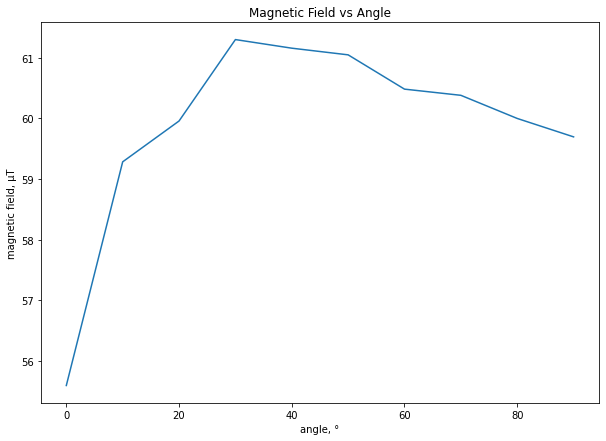

In [ ]:
# visualising dependency fo magnetic field vs angle
theta = np.arange(0,100, 10)
plt.figure(figsize=(10,7))
plt.plot(theta, data_mean)
plt.title('Magnetic Field vs Angle')
plt.xlabel('angle, %s' % deg_sign)
plt.ylabel('magnetic field, \u03BCT')

In [ ]:
# calculating t-test values across our dataset and storing them into 2d array
# for example, cell with raw number 3 and column number 5 stores t test for sets of angles 30 and 50
# thus, each diagonal cell stores 0
cross_t_test = np.zeros((10, 10))
for i, j in itertools.product(range(10), range(10)):
  cross_t_test[i][j] = abs(data_mean[i] - data_mean[j]) / np.sqrt (data_unc[i] ** 2 + data_unc[j] ** 2)

Text(964.9090909090908, 0.5, 'angle, °')

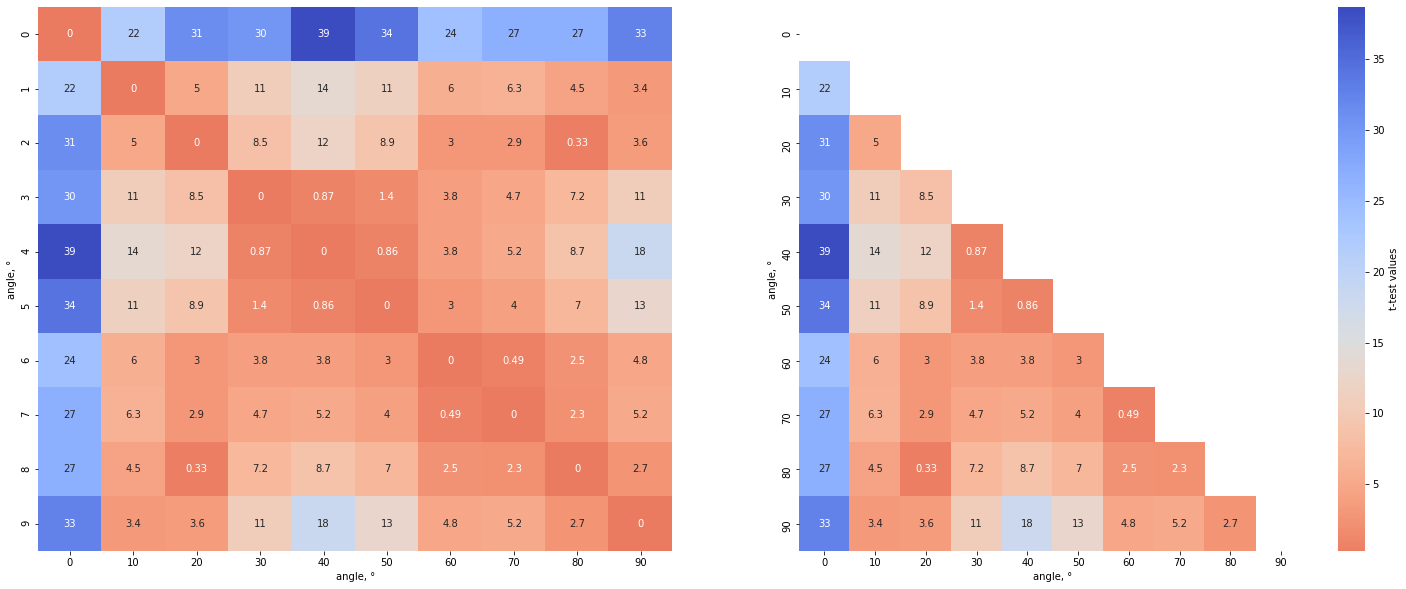

In [ ]:
#plotting heatmaps for t-values from array with values
#red cells contain values close to 0
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (25,10))
mask = np.triu(np.ones_like(cross_t_test))
sns.heatmap(cross_t_test, annot=True, cmap='coolwarm_r', ax=ax1, cbar=False, center=15)
sns.heatmap(cross_t_test, mask=mask, annot=True, cmap='coolwarm_r', ax=ax2, cbar_kws={'label': 't-test values'}, center=15)
ax1.set_xticklabels(theta)#ax1.set_yticklabels(theta)
ax1.set_xlabel('angle, %s' % deg_sign)
ax1.set_ylabel('angle, %s' % deg_sign)
ax2.set_xticklabels(theta)
ax2.set_yticklabels(theta)
ax2.set_xlabel('angle, %s' % deg_sign)
ax2.set_ylabel('angle, %s' % deg_sign)

In [ ]:
# printing t-test values that are less than 1, between 1 and 3, and their corresponding angles
print('the following angle datasets are likely to be indistinguishable(t < 1):')
for i, j in itertools.product(range(10), range(10)):
  if (cross_t_test[i][j] < 1) and (i < j):
    print('%d%s, %d%s' % (i * 10, deg_sign, j * 10, deg_sign))

print('the following angle datasets show weak correlation(1 < t < 3):')
for i, j in itertools.product(range(10), range(10)):
  if (1 < cross_t_test[i][j] < 3) and (i < j):
    print('%d%s, %d%s' % (i * 10, deg_sign, j * 10, deg_sign))

print('the following angle datasets dont show correlation(t > 3)')
for i, j in itertools.product(range(10), range(10)):
  if (cross_t_test[i][j] > 3) and (i < j):
    print('%d%s, %d%s' % (i * 10, deg_sign, j * 10, deg_sign))

the following angle datasets are likely to be indistinguishable(t < 1):
20°, 80°
30°, 40°
40°, 50°
60°, 70°
the following angle datasets show weak correlation(1 < t < 3):
20°, 70°
30°, 50°
50°, 60°
60°, 80°
70°, 80°
80°, 90°
the following angle datasets dont show correlation(t > 3)
0°, 10°
0°, 20°
0°, 30°
0°, 40°
0°, 50°
0°, 60°
0°, 70°
0°, 80°
0°, 90°
10°, 20°
10°, 30°
10°, 40°
10°, 50°
10°, 60°
10°, 70°
10°, 80°
10°, 90°
20°, 30°
20°, 40°
20°, 50°
20°, 60°
20°, 90°
30°, 60°
30°, 70°
30°, 80°
30°, 90°
40°, 60°
40°, 70°
40°, 80°
40°, 90°
50°, 70°
50°, 80°
50°, 90°
60°, 90°
70°, 90°


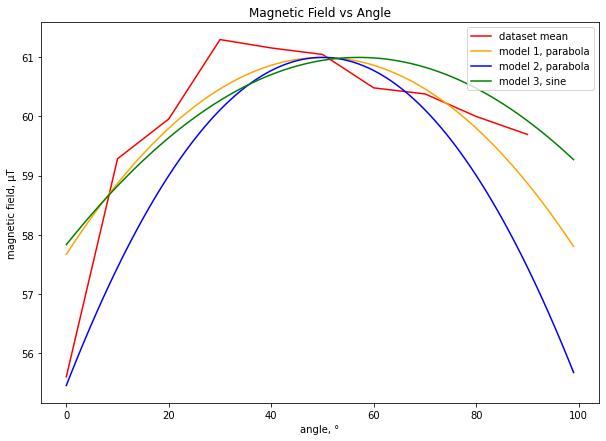

In [ ]:
#@title Default title text
plt.figure(figsize = (10, 7))
x1 = np.arange(0, 100, 10)
y1 = data_mean
x2 = np.arange(0, 100, 1)
y2 = 20 * np.sin( x2 / 100 + 1) + 41
y3 = -((x2 - 50) ** 2) / 750 + 61
y4 = -((x2 - 50) ** 2) /450 + 61
plt.plot(x1, y1, label='dataset mean', color='red')
plt.plot(x2, y3, label='model 1, parabola', color='orange')
plt.plot(x2, y4, label='model 2, parabola', color='blue')
plt.plot(x2, y2, label='model 3, sine', color='green')
plt.title('Magnetic Field vs Angle')
plt.xlabel('angle, %s' % deg_sign)
plt.ylabel('magnetic field, \u03BCT')
plt.legend(loc='upper right')

below code is a play-around with chi-squared 

---



In [ ]:
#@title Default title text
import time
import random
import torch
import torch.autograd
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [ ]:
#@title Default title text
# f(x, a, b, c) = a*(x**2) + b*x + c

In [ ]:
#@title Default title text
# chi_sq(x, y, a, b, c, x_unc) = sum(  ((f(x) - y)/x_unc)**2  )

In [ ]:
#@title Default title text
# [-0.001333, 0.133333, 57.666667]

In [ ]:
#@title Default title text
x = torch.arange(0, 100, 10)
y = torch.Tensor(data_mean)
unc = torch.Tensor(data_unc)


In [ ]:
#@title Default title text
features = torch.cat([x.unsqueeze(1) ** i for i in range(3)], 1)

In [ ]:
#@title Default title text
def polynom(features, params):
  for i in range(10):
    output[i] = torch.dot(features[i], torch.trasnpose(params, 0, 1))
  return output

In [ ]:
#@title Default title text
fc = torch.nn.Linear(3, 1, bias=False)
params = list(fc.parameters())

ModuleAttributeError: ignored

In [ ]:
#@title Default title text
def chi_sq_loss(output, y):
  for i in range(10):
    loss[i] = sum(  ((output[i] - y[i])/unc[i])**2  ) / 10
  loss = torch.LongTensor(loss)
  return loss

In [ ]:
#@title Default title text
criterion = nn.MSELoss
optimizer = optim.SGD(params, lr = 0.001, momentum=0.9, nesterov=False)

In [ ]:
#@title Default title text
start = time.time()
for j in range(100):
  features = Variable(features)
  y = Variable(y)
  features = features.squeeze()

  optimizer.zero_grad()
  print(features.type())
  output = fc(features)
  loss = chi_sq_loss(output, y)
  loss.backward()
  optimizer.step()

  end = time.time()
  if (i % 10) == 0 :
    print(loss, end - start)

print(loss, params, end - start)

torch.LongTensor


RuntimeError: ignored